# Regression

In [127]:
import pandas as pd
import quandl, datetime
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [128]:
import random

In [129]:
style.use('ggplot')

In [130]:
import math
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [131]:
quandl.ApiConfig.api_key = "77LBxDrVmdg2shza5qdX"
df = quandl.get('WIKI/GOOGL') #Check the Quandl website

In [132]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [133]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]] # We did this because not all variables might be usefull

In [134]:
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Close"]) / df['Adj. Close'] * 100.0

In [135]:
df["PCT_change"] = (df["Adj. Close"] - df["Adj. Open"]) / df['Adj. Open'] * 100.0

In [136]:
df = df[["Adj. Close", "HL_PCT", "PCT_change", "Adj. Volume"]] # We did this for simplicity. The variable that is most significant is only Adj. Close

In [137]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True)

In [138]:
forecast_out = int(math.ceil(0.1*len(df)))

In [139]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [140]:
X = np.array(df.drop(['label'], 1))

In [141]:
X = preprocessing.scale(X) # The issue with sparsity is that it very biased or in statistical terms skewed. So, therefore, scaling the data brings all your values onto one scale eliminating the sparsity. In regards to know how it works in mathematical detail, this follows the same concept of Normalization and Standardization. You can do research on those to find out how it works in detail. But to make life simpler the sklearn algorithm does everything for you !

In [142]:
X_lately = X[-forecast_out:] # Last 35 days

In [143]:
X = X[:-forecast_out]

In [144]:
df.dropna(inplace = True)

In [145]:
y = np.array(df['label'])

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [147]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [148]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf2 = pickle.load(pickle_in)

In [149]:
accuracy = clf.score(X_test, y_test)

In [150]:
accuracy # Accuracy is 97.84% on predicting the prices when shifted 1% of the days

0.8816754867951446

In [151]:
# What if we wanted to use SVM
clf1 = svm.SVR()
clf1.fit(X_train, y_train)
accuracy1 = clf1.score(X_test, y_test)

In [152]:
accuracy1 # Accuracy is much less

0.6962219623090322

In [153]:
# njobs means the number of jobs done at a time
# clf = LinearRegression(n_jobs = 2)

In [154]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[ 963.79895305  949.73397849  980.81381905  975.37777422  986.83942381
  980.59763273  986.19971791  988.16338259  978.00540964  975.09340972
 1005.6822211   995.07520478  978.80762227  961.0937764   964.0570856
  979.41702167  977.46693032  996.38677586  998.29520008 1017.41493174
 1014.15047312 1030.80766855 1029.65886256 1025.33161107 1014.78620886
 1020.69650293 1019.30689352 1014.26338488 1011.70703662 1011.70349281
 1019.62512    1008.49573606 1005.51959958  994.47454882 1017.56182647
 1013.03243002 1018.78080616 1041.48727277 1036.02079921 1033.47382633
 1036.77855151 1035.80748854 1040.74458856 1032.85464294 1033.83567402
 1036.24766967 1032.79840539 1063.04479114 1063.01693908 1073.65328791
 1069.68591058 1070.69505516 1033.24494329 1026.14133125 1020.68178138
 1031.18634625 1028.07038713 1025.50469213 1039.88125289 1039.89311578
 1035.87290009 1045.02705175 1050.39217017 1049.70477278 1048.48632591
 1053.38710341 1059.44879657 1063.42192245 1066.99456698 1062.52691707
 1057.2

In [155]:
df['Forecast'] = np.nan

In [156]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()

In [157]:
one_day = 86400

In [158]:
next_unix = last_unix + one_day

In [159]:
# We're iterating through the forecast set taking each forecast day and then setting those as the values in the dataframe
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]
    # .loc references the index for the dataframe

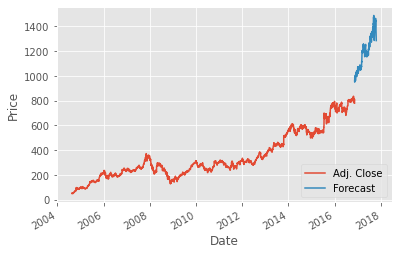

In [160]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [161]:
# For loop: The date is the index so when we say df.date, we're saying the index, and if the index doesnt exisit, it's gonna create it, and if it exists it's gonna replace it.
# Next, were saying np.nan ...., what that i?s is just a list of values that are np.nan for all the variables. All these are not a number because it's in the future and we dont have information on that data. 
# +[i] is the forecast. We're just saying that it just this list plus one value so its like thise huge list (variables + 1)

In [162]:
clf2 # trial

LinearRegression()

In [163]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [164]:
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)

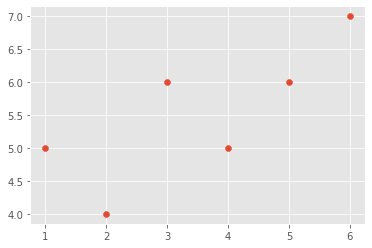

In [165]:
plt.scatter(xs,ys)
plt.show()

In [166]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs * ys)) /
         (mean(xs) * mean(xs) - mean(xs**2)))
    b = mean(ys) - m * mean(xs)
    return m, b

In [167]:
m, b = best_fit_slope_and_intercept(xs,ys)

In [168]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [169]:
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [170]:
print(m,b)

0.42857142857142866 4.0


In [171]:
regression_line = [(m * x) + b for x in xs]

In [172]:
regression_line

[4.428571428571429,
 4.857142857142858,
 5.2857142857142865,
 5.714285714285714,
 6.142857142857143,
 6.571428571428572]

In [173]:
predict_x = 8
predict_y = (m*predict_x) + b

In [174]:
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.5844155844155845

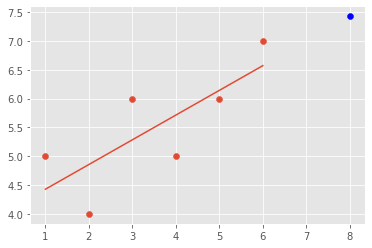

In [176]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color = "blue")
plt.plot(xs, regression_line)
plt.show()

# Testing Assumptions

In [177]:
def create_dataset(hm, variance, step = 2, correlation = False): # hm: how many datapoints, step: how far on average to step up the y-variable
    val = 1
    ys1 = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys1.append(y)
        if correlation and correlation == "pos":
            val += step
        elif correlation and correlation == "neg":
            val -= step
    xs1 = [i for i in range(len(ys1))]
    
    return np.array(xs1, dtype = np.float64), np.array(ys1, dtype = np.float64)

In [178]:
xs1, ys1 = create_dataset(40, 10, 2, correlation = 'pos')

In [179]:
m1, b1 = best_fit_slope_and_intercept(xs1,ys1)

In [180]:
regression_line = [(m1 * x) + b1 for x in xs1]

In [181]:
predict_x = 8
predict_y = (m1*predict_x) + b1

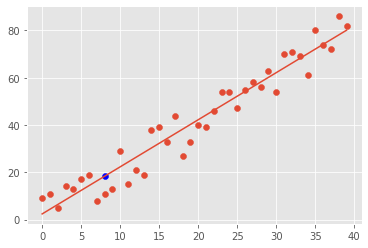

In [182]:
plt.scatter(xs1,ys1)
plt.scatter(predict_x, predict_y, color = "blue")
plt.plot(xs1, regression_line)
plt.show()

In [183]:
r_squared1 = coefficient_of_determination(ys1, regression_line)
r_squared1

0.9372670383634044

In [184]:
# As the variance decrease, the coefficient of determination will increase

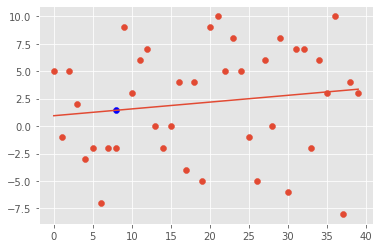

0.020740553953723095

In [185]:
xs2, ys2 = create_dataset(40, 10, 2, correlation = False)
m2, b2 = best_fit_slope_and_intercept(xs2,ys2)
regression_line = [(m2 * x) + b2 for x in xs2]
predict_x = 8
predict_y = (m2*predict_x) + b2
plt.scatter(xs2,ys2)
plt.scatter(predict_x, predict_y, color = "blue")
plt.plot(xs2, regression_line)
plt.show()
r_squared2 = coefficient_of_determination(ys2, regression_line)
r_squared2

In [186]:
# Since the datapoints are not correlated, the data is not linear. Thus bad regression fit